<a href="https://colab.research.google.com/github/bipinpr/100-Days-Of-ML-Code/blob/master/Decision_tree_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/heart1.csv")

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,0


In [ ]:
x = df.iloc[:,:-1]
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  
0        0   0  
1        0   0  
2        2   0  
3        2   0  
4 

In [ ]:
y=df.iloc[:,-1:]
print(y)

     target
0         1
1         1
2         1
3         1
4         1
..      ...
298       0
299       0
300       0
301       0
302       0

[303 rows x 1 columns]


random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic. If you don't set a seed, it is different each time.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10, test_size=0.2)


In [ ]:
print(x_train.shape)
print(x_test.shape)

(242, 12)
(61, 12)


In [ ]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
246,56,0,0,134,409,0,0,150,1,1.9,1,2
183,58,1,2,112,230,0,0,165,0,2.5,1,1
229,64,1,2,125,309,0,1,131,1,1.8,1,0
126,47,1,0,112,204,0,1,143,0,0.1,2,0
184,50,1,0,150,243,0,0,128,0,2.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
277,57,1,1,124,261,0,1,141,0,0.3,2,0
121,59,1,0,138,271,0,0,182,0,0.0,2,0
187,54,1,0,124,266,0,0,109,1,2.2,1,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1


In [ ]:
# Building Decision Tree classifier
#classifier = tree.DecisionTreeClassifier(max_depth=)

classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_pred


array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

[[24 11]
 [ 5 21]]


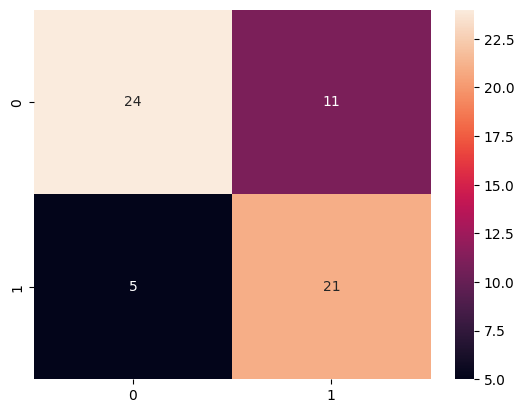

In [ ]:
sns.heatmap(cfm,annot=True)
plt.show()

In [ ]:
y_new_pred = classifier.predict([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_new_pred

array([1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.66      0.81      0.72        26

    accuracy                           0.74        61
   macro avg       0.74      0.75      0.74        61
weighted avg       0.75      0.74      0.74        61



[Text(0.5828804347826086, 0.95, 'x[2] <= 0.5\ngini = 0.489\nsamples = 242\nvalue = [103, 139]'),
 Text(0.35597826086956524, 0.85, 'x[11] <= 0.5\ngini = 0.405\nsamples = 110\nvalue = [79, 31]'),
 Text(0.21195652173913043, 0.75, 'x[8] <= 0.5\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.08695652173913043, 0.65, 'x[0] <= 41.5\ngini = 0.32\nsamples = 25\nvalue = [5, 20]'),
 Text(0.043478260869565216, 0.55, 'x[3] <= 128.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.021739130434782608, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.06521739130434782, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13043478260869565, 0.55, 'x[7] <= 96.5\ngini = 0.236\nsamples = 22\nvalue = [3, 19]'),
 Text(0.10869565217391304, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15217391304347827, 0.45, 'x[4] <= 271.5\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(0.13043478260869565, 0.35, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.173913043478

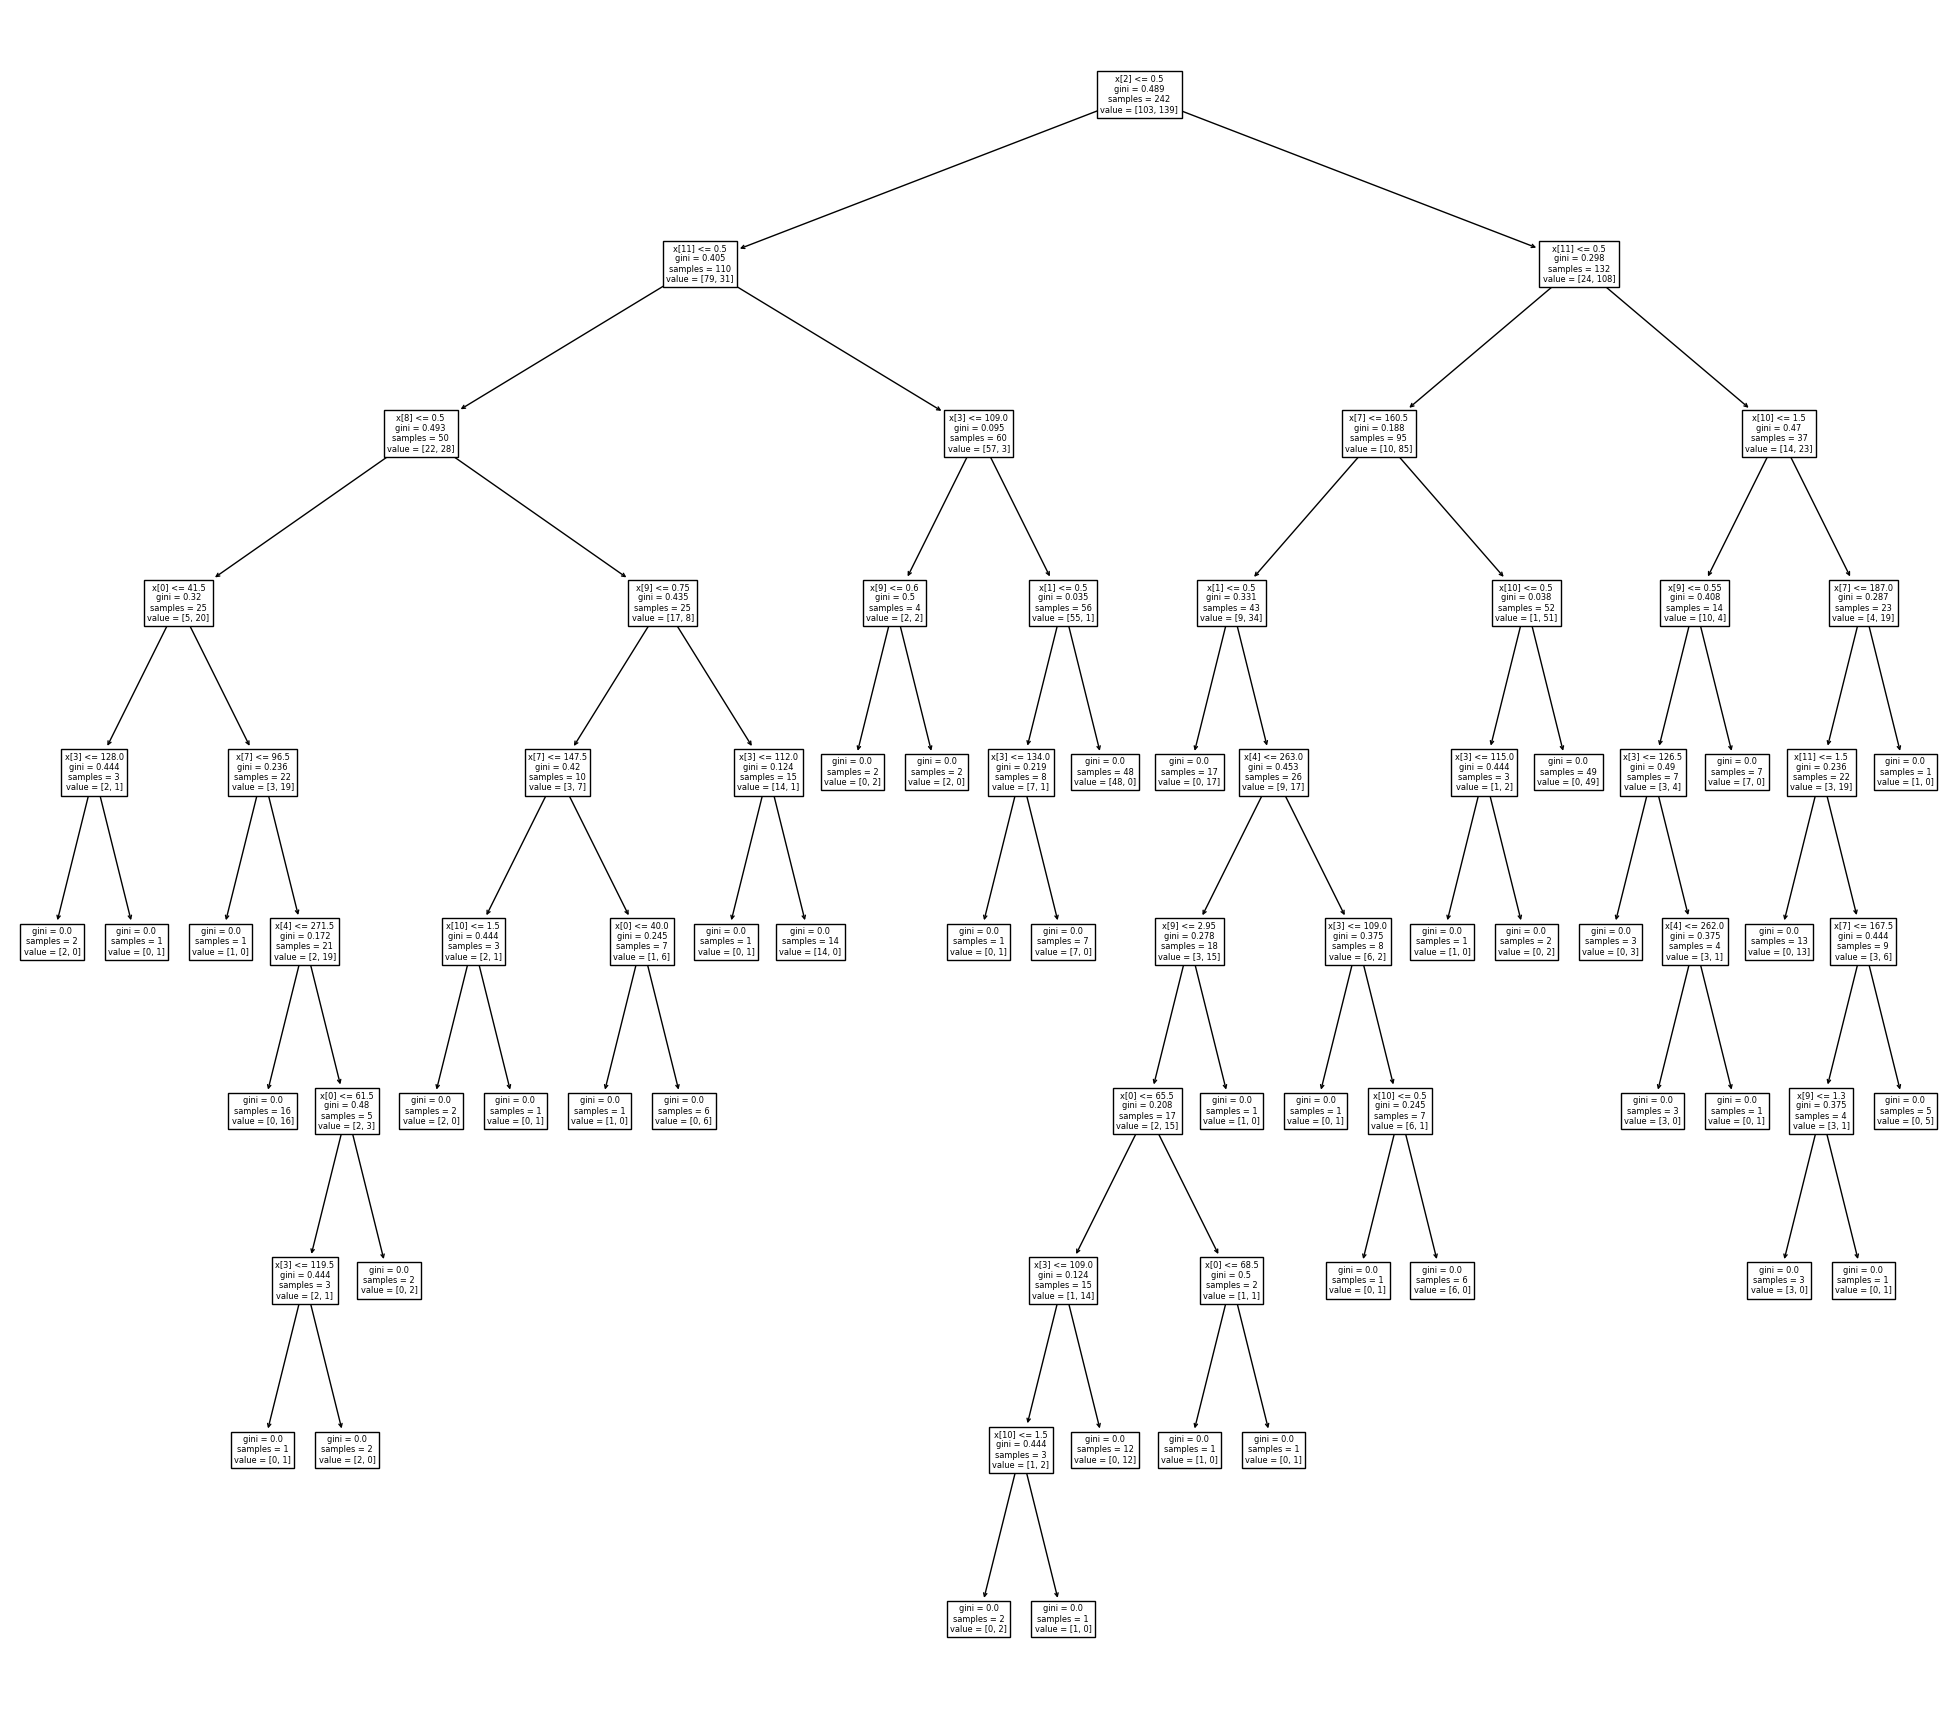

In [ ]:
plt.figure(figsize = (25, 22))
tree.plot_tree(classifier)

In [ ]:
y_pred_train=classifier.predict(x_train)

In [ ]:
from sklearn.metrics import confusion_matrix
cfm1=confusion_matrix(y_pred_train,y_train)
print(cfm1)

[[103   0]
 [  0 139]]


In [ ]:

print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       139

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

